sourse for code: https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Iterate through directories or join paths
import os
import cv2

# mount google drive locally
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Specify data directory and read the images into an array

9030
0.5625


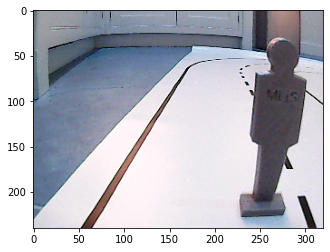

In [8]:
directory = '/content/drive/My Drive/AutonomousDriving/training_data/training_data'

#check one image
for image in os.listdir(directory):
  image_array = cv2.imread(os.path.join(directory,image))
  imageID,_ = image.split(sep = ".", maxsplit = 2)
  imageID = int(imageID)  
  print(imageID)
  # Remeber that python counts from 0 so our 0 entry is the first image
  print(df_train_labels.iloc[imageID - 1][1])
  plt.imshow(image_array)
  plt.show()
  break

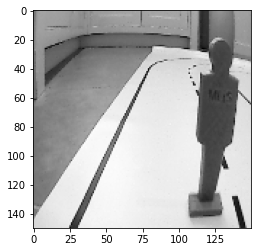

In [ ]:
#Scale
IMG_SIZE = 150

new_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

Import the training dataset labels as a pandas dataframe

In [7]:
import pandas as pd
df_train_labels = pd.read_csv('/content/drive/My Drive/AutonomousDriving/training_norm.csv')
df_train_labels.head(5)

,image_id,angle,speed
0,1,0.4375,0.0
1,2,0.8125,1.0
2,3,0.4375,1.0
3,4,0.6250,1.0
4,5,0.5000,0.0


Read training data (Note that rescaling will be applied after the data are stored as pickle to allow extra flexibility during training, so not in this file!)

In [9]:
image_train = []
count = 0
directory = '/content/drive/My Drive/AutonomousDriving/training_data/training_data'

for image in os.listdir(directory):
  image_array_new = cv2.imread(os.path.join(directory,image))
  imageID,_ = image.split(sep = ".", maxsplit = 2)
  imageID = int(imageID)  
  # Exlude any images that return noneType error (only five were identified)
  if np.count_nonzero(pd.isnull(image_array_new)): 
    print("NA: This image was not read well so we will skip for now")
  else:
    # resize to 150 x 150
    #new_image_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
    image_train.append([imageID,image_array_new, df_train_labels.iloc[imageID - 1][1], df_train_labels.iloc[imageID - 1][2]])

  count +=1
  if count%100 == 0:
    print("imageid is:", imageID)
    print("Angle of this id is:",df_train_labels.iloc[imageID - 1][1])
    print("count:",count)

imageid is: 9165
Angle of this id is: 0.5
count: 100
imageid is: 9356
Angle of this id is: 0.5
count: 200
imageid is: 9354
Angle of this id is: 0.75
count: 300
imageid is: 9524
Angle of this id is: 0.5
count: 400
imageid is: 9405
Angle of this id is: 0.6875
count: 500
imageid is: 9609
Angle of this id is: 0.75
count: 600
imageid is: 970
Angle of this id is: 0.5
count: 700
imageid is: 9922
Angle of this id is: 0.5625
count: 800
imageid is: 9818
Angle of this id is: 0.4375
count: 900
imageid is: 999
Angle of this id is: 0.5
count: 1000
imageid is: 8373
Angle of this id is: 0.6875
count: 1100
imageid is: 8335
Angle of this id is: 0.375
count: 1200
imageid is: 8474
Angle of this id is: 0.1875
count: 1300
imageid is: 860
Angle of this id is: 0.6875
count: 1400
imageid is: 8541
Angle of this id is: 0.625
count: 1500
imageid is: 8657
Angle of this id is: 0.625
count: 1600
imageid is: 8823
Angle of this id is: 0.625
count: 1700
imageid is: 8976
Angle of this id is: 0.5
count: 1800
imageid is: 

In [10]:
print(len(image_train))


print(image_train[12300])
print(df_train_labels.iloc[12304][1])

13798
[11038, array([[[217, 204, 195],
        [218, 205, 196],
        [214, 206, 196],
        ...,
        [176, 165, 169],
        [178, 167, 173],
        [179, 168, 174]],

       [[215, 202, 195],
        [217, 203, 196],
        [218, 204, 197],
        ...,
        [176, 169, 170],
        [176, 171, 172],
        [173, 168, 169]],

       [[217, 204, 195],
        [217, 204, 195],
        [217, 203, 196],
        ...,
        [179, 171, 177],
        [173, 170, 173],
        [174, 171, 174]],

       ...,

       [[179, 210, 221],
        [180, 211, 222],
        [188, 208, 225],
        ...,
        [228, 224, 236],
        [230, 222, 239],
        [231, 223, 240]],

       [[185, 208, 222],
        [185, 208, 222],
        [191, 206, 224],
        ...,
        [228, 222, 241],
        [229, 223, 235],
        [220, 213, 226]],

       [[195, 211, 217],
        [195, 211, 217],
        [191, 207, 221],
        ...,
        [230, 222, 239],
        [229, 227, 234],
        [2

Serialization, Pickle it

In [11]:
import pickle

# With allows to automatically close the file
#with open('/content/drive/My Drive/AutonomousDriving/train.pickle', 'wb') as ff:
with open('/content/drive/My Drive/AutonomousDriving/trainColour.pickle', 'wb') as ff:
  pickle.dump(image_train, ff)

Read test data 

In [ ]:
image_test = []
count = 0
directory_test = '/content/drive/My Drive/AutonomousDriving/test_data/test_data'
IMG_SIZE = 150

for image in os.listdir(directory_test):
  image_array = cv2.imread(os.path.join(directory_test,image),cv2.IMREAD_GRAYSCALE)

  # Exlude any images that return noneType error
  if np.count_nonzero(pd.isnull(image_array)): 
    print("NA: This image was not read well")
    print("count"+count)
  else:
    # resize to 150 x 150
    new_image_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
    image_test.append(new_image_array)

  count +=1
  if count%100 == 0:
    print(count)

100
200
300
400
500
600
700
800
900
1000


Test length of dataset is 1020

In [ ]:
print(len(image_test))
print(image_test[0])

1020
[[ 70  77  42 ... 116 127  87]
 [ 40 133 141 ...  87  94  93]
 [121 121 118 ...  18  15  16]
 ...
 [228 229 229 ... 236 233 234]
 [228 228 229 ... 235 235 235]
 [228 227 221 ... 235 235 233]]


Serialize test dataset

In [ ]:
import pickle

# With allows to automatically close the file
with open('/content/drive/My Drive/AutonomousDriving/testGrayScaled.pickle', 'wb') as ff:
  pickle.dump(image_test, ff)